In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = r'D:\certan\dataset'
data_test_path = r'D:\certan\dataset'
data_val_path = r'D:\certan\dataset'

In [4]:
img_width = 180
img_height =180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1467 files belonging to 3 classes.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 1467 files belonging to 3 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=True,
    batch_size=32,
    validation_split=False
)

Found 1467 files belonging to 3 classes.


In [14]:
data_unggas = data_train.class_names

In [16]:
data_unggas

['Angsa', 'Bebek', 'Itik']

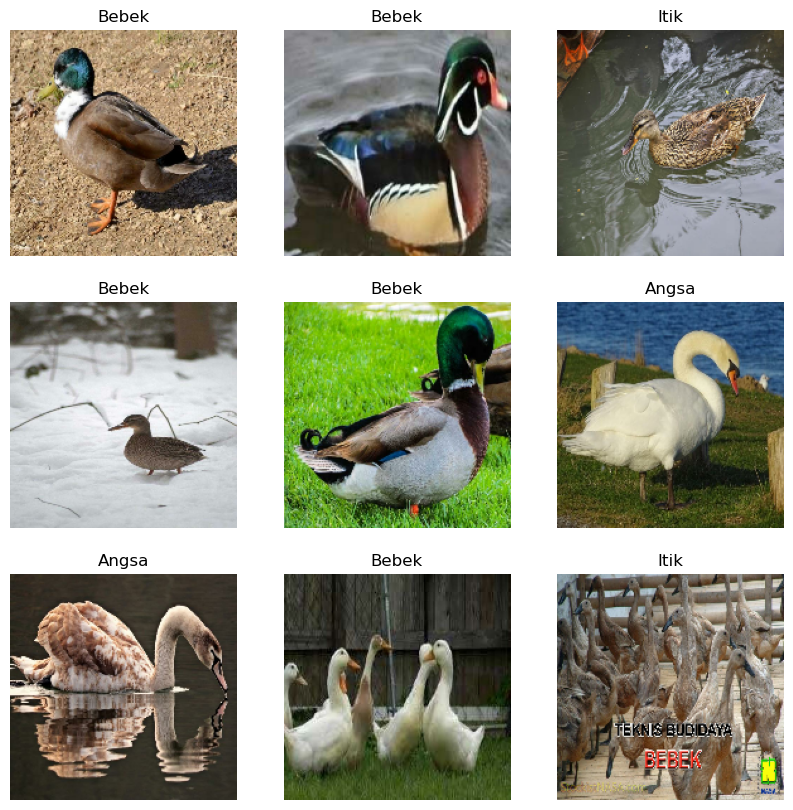

In [18]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_unggas[labels[i]])
        plt.axis('off')

In [20]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras import Sequential, layers

# Perbaikan model dengan augmentasi
model = Sequential([
    # Augmentasi data
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),  # Membalik gambar secara horizontal
    layers.RandomRotation(0.9),  # Rotasi acak hingga 10%
    layers.RandomZoom(0.1),  # Zoom in/out hingga 10%
    layers.RandomContrast(0.2),  # Mengubah kontras gambar secara acak
    layers.RandomBrightness(factor=0.2),  # Menambah/mengurangi kecerahan secara acak
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Translasi gambar secara horizontal/vertikal hingga 20%
    layers.GaussianNoise(0.1),
    
    # Normalisasi data
    layers.Rescaling(1./255),  
    
    # Convolutional layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_unggas), activation='softmax')  # Output untuk klasifikasi
])

C:\Users\TUF\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast (RandomContrast)     │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness (RandomBrightness) │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 180, 180, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,080,419 (7.94 MB)

 Trainable params: 2,080,419 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 100
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/100


C:\Users\TUF\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.3557 - loss: 1.1261 - val_accuracy: 0.4990 - val_loss: 0.9958
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 519ms/step - accuracy: 0.5114 - loss: 0.9828 - val_accuracy: 0.5760 - val_loss: 0.9352
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 516ms/step - accuracy: 0.6132 - loss: 0.8578 - val_accuracy: 0.6026 - val_loss: 0.9234
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.6273 - loss: 0.8282 - val_accuracy: 0.6796 - val_loss: 0.7276
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 311ms/step - accuracy: 0.6282 - loss: 0.7944 - val_accuracy: 0.7130 - val_loss: 0.6749
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 346ms/step - accuracy: 0.6630 - loss: 0.7699 - val_accuracy: 0.6380 - val_loss: 0.7822
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 412ms/step - accuracy: 0.6617 - loss: 0.7359 - val_accuracy: 0.7301 - val_loss: 0.6443
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.6805 - loss: 0.7222 - val_accuracy

Text(0.5, 1.0, 'Loss')

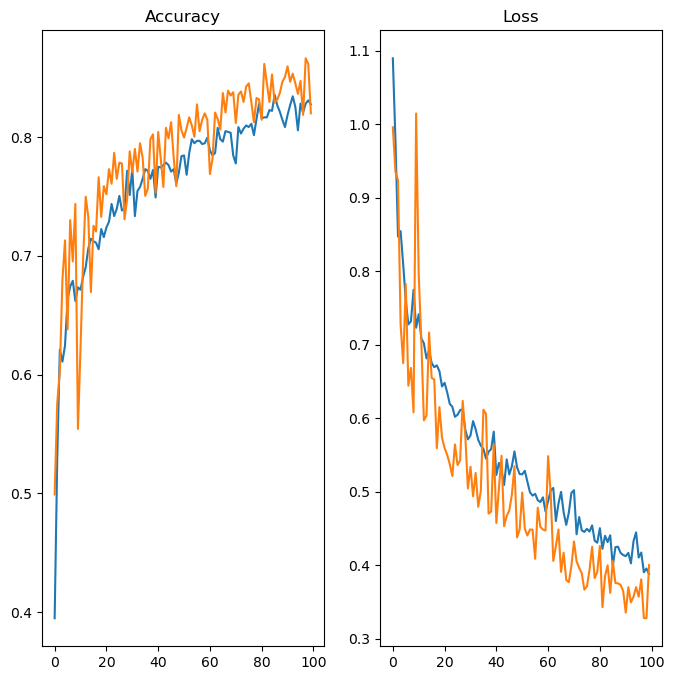

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
model.save('model12.keras')

In [17]:
from keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('model11.keras')

# Menampilkan ringkasan model untuk memastikan model berhasil dimuat
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_3 (RandomContrast)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness_3                  │ (None, 180, 180, 3)         │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_3                 │ (None, 180, 180, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_3 (GaussianNoise)     │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 6,241,259 (23.81 MB)

 Trainable params: 2,080,419 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,160,840 (15.87 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━

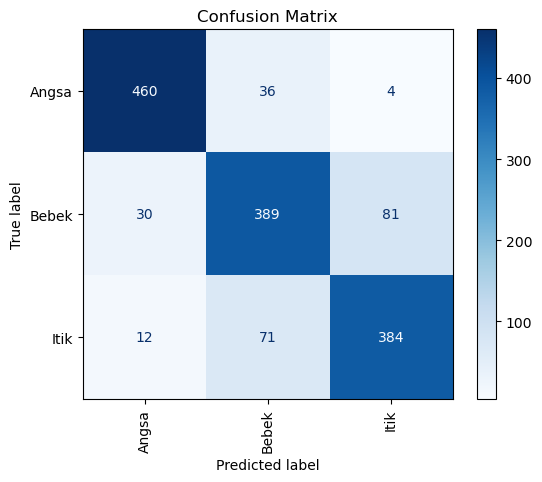

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
# Ambil semua data uji untuk prediksi
y_true = []  # Label sebenarnya
y_pred = []  # Label prediksi

for images, labels in data_test:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)
# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_unggas)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


In [28]:
# Evaluasi model pada data uji

test_loss, test_accuracy = model.evaluate(data_test)

print(f"Akurasi pada data uji: {test_accuracy * 100:.2f}%")
print(f"Loss pada data uji: {test_loss:.4f}")


C:\Users\TUF\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.3297 - loss: 1.0988
Akurasi pada data uji: 32.31%
Loss pada data uji: 1.0991


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


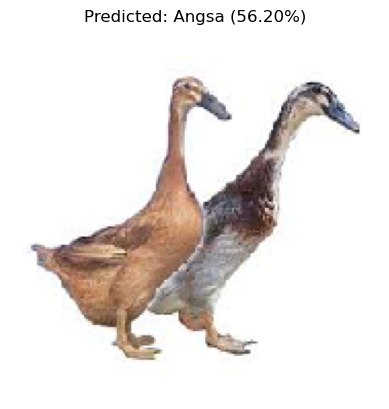

Predicted class: Angsa
Confidence: 56.20%


In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Memuat model yang sudah disimpan
model = tf.keras.models.load_model('aku.keras')

# 2. Memuat gambar yang akan diuji
img_path = r'C:\Users\TUF\Pictures\DATASET\itik\images (5).jpg'  # Ganti dengan path gambar yang ingin diuji
img = image.load_img(img_path, target_size=(img_width, img_height))

# 3. Mengonversi gambar ke array dan normalisasi
img_array = image.img_to_array(img)  # Mengonversi gambar ke array
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi gambar dalam rentang [0, 1]

# 4. Melakukan prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
predicted_prob = np.max(predictions)  # Probabilitas untuk kelas yang diprediksi

# 5. Menampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f"Predicted: {data_unggas[predicted_class[0]]} ({predicted_prob * 100:.2f}%)")
plt.axis('off')
plt.show()

# 6. Menampilkan hasil prediksi dan persentase
print(f"Predicted class: {data_unggas[predicted_class[0]]}")
print(f"Confidence: {predicted_prob * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


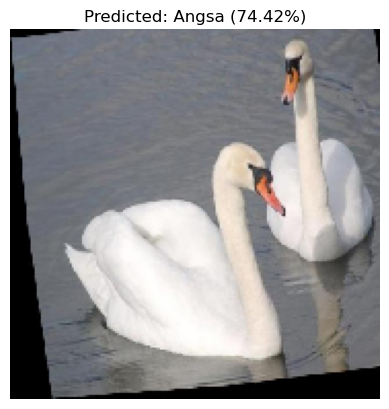

Predicted class: Angsa
Confidence: 74.42%


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Memuat model yang sudah disimpan
model = tf.keras.models.load_model('aku.keras')

# 2. Memuat gambar yang akan diuji
img_path = r'D:\certan\dataset\Angsa\img_67_jpg.rf.6a76481e531368a98a64c5031da396b7.jpg'  # Ganti dengan path gambar yang ingin diuji
img = image.load_img(img_path, target_size=(img_width, img_height))

# 3. Mengonversi gambar ke array dan normalisasi
img_array = image.img_to_array(img)  # Mengonversi gambar ke array
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi gambar dalam rentang [0, 1]

# 4. Melakukan prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
predicted_prob = np.max(predictions)  # Probabilitas untuk kelas yang diprediksi

# 5. Menampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f"Predicted: {data_unggas[predicted_class[0]]} ({predicted_prob * 100:.2f}%)")
plt.axis('off')
plt.show()

# 6. Menampilkan hasil prediksi dan persentase
print(f"Predicted class: {data_unggas[predicted_class[0]]}")
print(f"Confidence: {predicted_prob * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


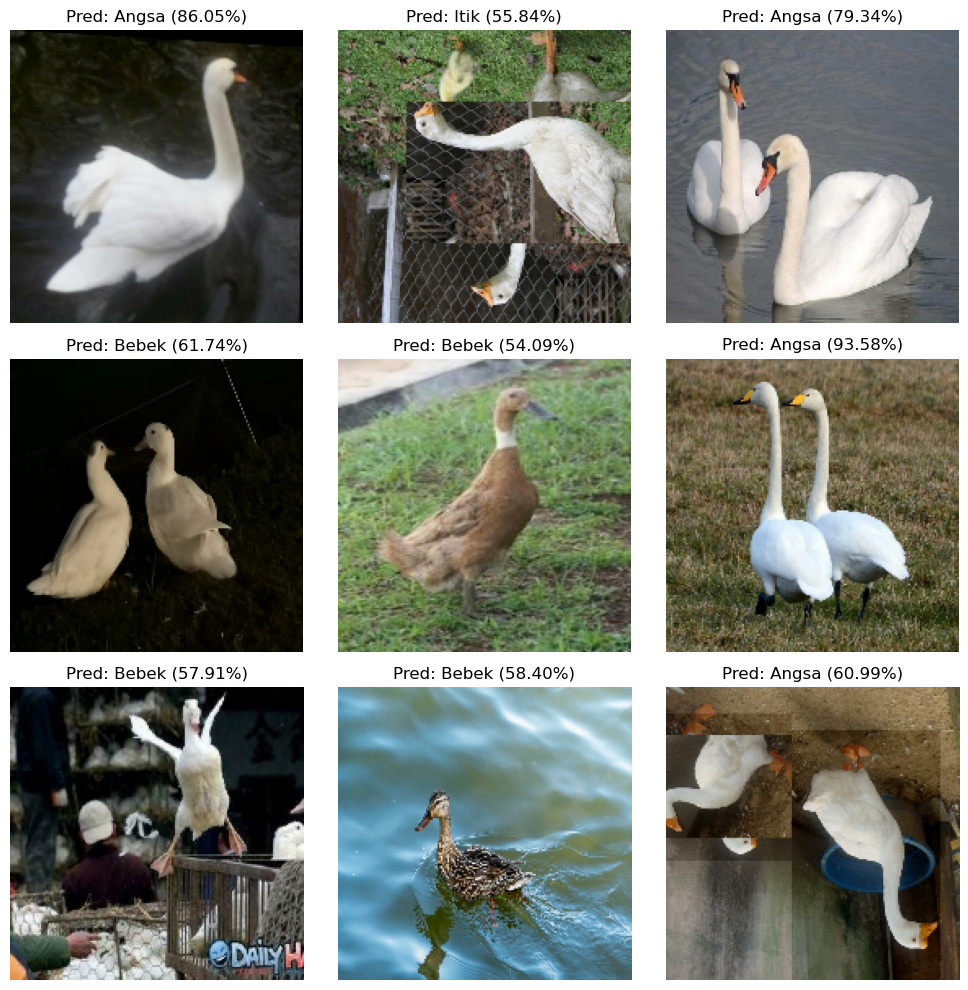

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

# Ambil satu batch dari data test
for images, labels in data_test.take(1):  
    predictions = model.predict(images)  # Prediksi batch gambar
    predicted_classes = np.argmax(predictions, axis=1)  # Ambil kelas prediksi
    predicted_probs = np.max(predictions, axis=1)  # Ambil probabilitas tertinggi untuk tiap prediksi

    for i in range(9):  # Tampilkan 9 gambar pertama
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Tampilkan gambar
        pred_class = data_unggas[predicted_classes[i]]  # Kelas prediksi
        true_class = data_unggas[labels[i]]  # Kelas sebenarnya
        prob = predicted_probs[i] * 100  # Konversi probabilitas ke persen
        
        # Set judul dengan prediksi, probabilitas, dan kelas sebenarnya
        plt.title(f"Pred: {pred_class} ({prob:.2f}%)")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
model.save('aku.keras')

In [24]:
epochs_size = 30
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 485ms/step - accuracy: 0.8350 - loss: 0.3751 - val_accuracy: 0.8534 - val_loss: 0.3425
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.8374 - loss: 0.3519 - val_accuracy: 0.8718 - val_loss: 0.3114
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 502ms/step - accuracy: 0.8504 - loss: 0.3482 - val_accuracy: 0.8712 - val_loss: 0.3058
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 482ms/step - accuracy: 0.8345 - loss: 0.3822 - val_accuracy: 0.8603 - val_loss: 0.3097
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 467ms/step - accuracy: 0.8429 - loss: 0.3825 - val_accuracy: 0.8575 - val_loss: 0.3400
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 498ms/step - accuracy: 0.8402 - loss: 0.3839 - val_accuracy: 0.8746 - val_loss: 0.2990
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.8447 - loss: 0.3664 - val_accuracy: 0.8712 - val_loss: 0.3139
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step - accuracy: 0.8480 - loss: 0.3511 - val_accu

Text(0.5, 1.0, 'Loss')

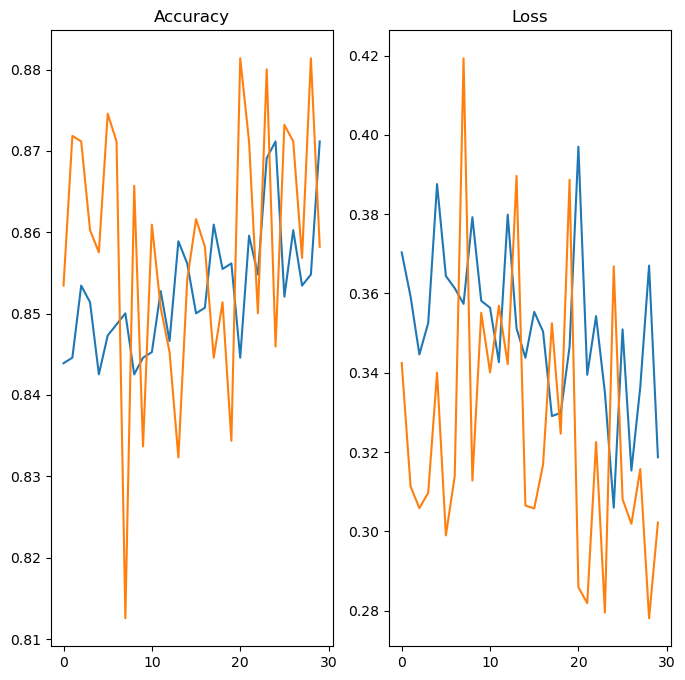

In [26]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [28]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.8528 - loss: 0.3357 - val_accuracy: 0.8896 - val_loss: 0.2842
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step - accuracy: 0.8389 - loss: 0.3718 - val_accuracy: 0.8759 - val_loss: 0.2804
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.8530 - loss: 0.3363 - val_accuracy: 0.8500 - val_loss: 0.3203
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.8636 - loss: 0.3035 - val_accuracy: 0.8603 - val_loss: 0.3206
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 327ms/step - accuracy: 0.8573 - loss: 0.3463 - val_accuracy: 0.8507 - val_loss: 0.3350
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.8488 - loss: 0.3507 - val_accuracy: 0.8657 - val_loss: 0.3028
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.8819 - loss: 0.3136 - val_accuracy: 0.8678 - val_loss: 0.3155
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.8646 - loss: 0.3367 - val_accu

Text(0.5, 1.0, 'Loss')

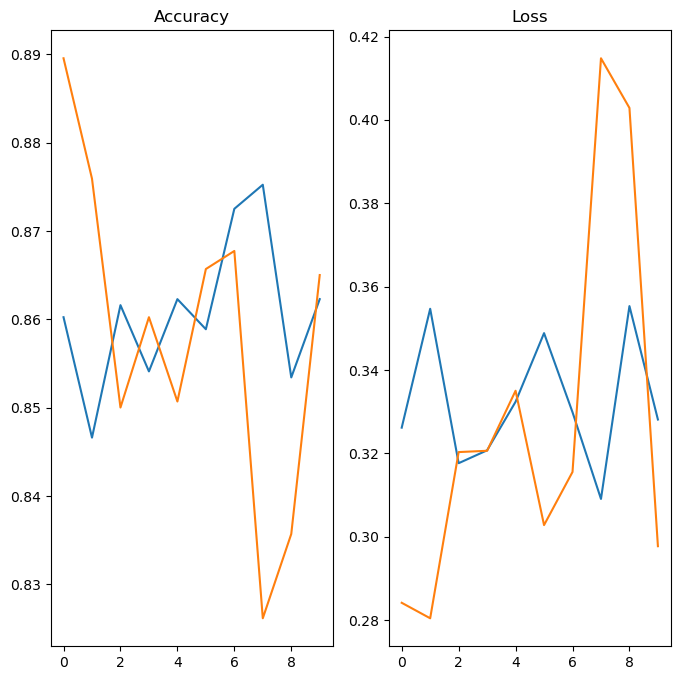

In [30]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')